# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

586

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
city_data = []
print ("Beginning Data Retrieval              ")
print ("--------------------------------------")

record_count = 1
set_count = 1

for i, city in enumerate(cities):
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    city_url = url + "&q=" + city
    print ("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    record_count += 1
    try:
        
        city_weather = requests.get(city_url).json()
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather ["sys"]["country"]
        city_date = city_weather ["dt"]
        
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        #print("yes")
    except:
        print("City not found. Skipping...")    
    
print("------------------------------")
print("Data Retrieval Complete       ")
print("------------------------------")
city_data

Beginning Data Retrieval              
--------------------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | bengkulu
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | esperance
Processing Record 5 of Set 1 | kapaa
Processing Record 6 of Set 1 | yulara
Processing Record 7 of Set 1 | aksarka
Processing Record 8 of Set 1 | fort thomas
Processing Record 9 of Set 1 | meadow lake
Processing Record 10 of Set 1 | saldanha
Processing Record 11 of Set 1 | ancud
Processing Record 12 of Set 1 | bambous virieux
Processing Record 13 of Set 1 | port alfred
Processing Record 14 of Set 1 | atar
Processing Record 15 of Set 1 | atbasar
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | port lincoln
Processing Record 18 of Set 1 | byron bay
Processing Record 19 of Set 1 | constitucion
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | riyadh
Processing Record 22 of Set 1 | camana
Processing Record 23 of Set

Processing Record 42 of Set 4 | sola
Processing Record 43 of Set 4 | vila velha
Processing Record 44 of Set 4 | vestmannaeyjar
Processing Record 45 of Set 4 | saskylakh
Processing Record 46 of Set 4 | kirakira
Processing Record 47 of Set 4 | nikolskoye
Processing Record 48 of Set 4 | pampierstad
Processing Record 49 of Set 4 | chumikan
Processing Record 0 of Set 5 | lavras
Processing Record 1 of Set 5 | shestakovo
Processing Record 2 of Set 5 | aripuana
Processing Record 3 of Set 5 | thompson
Processing Record 4 of Set 5 | nemuro
Processing Record 5 of Set 5 | marshall
Processing Record 6 of Set 5 | plettenberg bay
Processing Record 7 of Set 5 | wladyslawowo
Processing Record 8 of Set 5 | luanda
Processing Record 9 of Set 5 | trat
Processing Record 10 of Set 5 | provideniya
Processing Record 11 of Set 5 | lasa
Processing Record 12 of Set 5 | viedma
Processing Record 13 of Set 5 | saint-augustin
Processing Record 14 of Set 5 | bethel
Processing Record 15 of Set 5 | belmonte
Processing R

Processing Record 30 of Set 8 | ekibastuz
Processing Record 31 of Set 8 | abha
Processing Record 32 of Set 8 | gombong
Processing Record 33 of Set 8 | zlatoust
Processing Record 34 of Set 8 | ilulissat
Processing Record 35 of Set 8 | ixtapa
Processing Record 36 of Set 8 | egvekinot
Processing Record 37 of Set 8 | hambantota
Processing Record 38 of Set 8 | yanji
Processing Record 39 of Set 8 | warri
Processing Record 40 of Set 8 | bilma
Processing Record 41 of Set 8 | swellendam
Processing Record 42 of Set 8 | laje
Processing Record 43 of Set 8 | rio verde de mato grosso
Processing Record 44 of Set 8 | topeka
Processing Record 45 of Set 8 | laiagam
City not found. Skipping...
Processing Record 46 of Set 8 | hit
Processing Record 47 of Set 8 | kemijarvi
City not found. Skipping...
Processing Record 48 of Set 8 | nishihara
Processing Record 49 of Set 8 | vadso
Processing Record 0 of Set 9 | littleton
Processing Record 1 of Set 9 | wattegama
Processing Record 2 of Set 9 | lompoc
Processing

Processing Record 18 of Set 12 | tura
Processing Record 19 of Set 12 | aleksandrov gay
Processing Record 20 of Set 12 | oksovskiy
Processing Record 21 of Set 12 | nuuk
Processing Record 22 of Set 12 | miranorte
City not found. Skipping...
Processing Record 23 of Set 12 | catabola
Processing Record 24 of Set 12 | daman
Processing Record 25 of Set 12 | kholtoson
Processing Record 26 of Set 12 | saleaula
City not found. Skipping...
Processing Record 27 of Set 12 | daboh
Processing Record 28 of Set 12 | dali
Processing Record 29 of Set 12 | portland
Processing Record 30 of Set 12 | matagami
Processing Record 31 of Set 12 | billings
Processing Record 32 of Set 12 | belgrade
Processing Record 33 of Set 12 | panguna
Processing Record 34 of Set 12 | mahibadhoo
Processing Record 35 of Set 12 | ca mau
------------------------------
Data Retrieval Complete       
------------------------------


[{'City': 'albany',
  'Lat': 42.6,
  'Lng': -73.97,
  'Max Temp': 28,
  'Humidity': 44,
  'Cloudiness': 1,
  'Wind Speed': 8.05,
  'Country': 'US',
  'Date': 1581791608},
 {'City': 'bengkulu',
  'Lat': -3.8,
  'Lng': 102.27,
  'Max Temp': 73.99,
  'Humidity': 94,
  'Cloudiness': 43,
  'Wind Speed': 3.98,
  'Country': 'ID',
  'Date': 1581791608},
 {'City': 'avarua',
  'Lat': -21.21,
  'Lng': -159.78,
  'Max Temp': 80.6,
  'Humidity': 88,
  'Cloudiness': 100,
  'Wind Speed': 6.93,
  'Country': 'CK',
  'Date': 1581791608},
 {'City': 'esperance',
  'Lat': -33.87,
  'Lng': 121.9,
  'Max Temp': 68,
  'Humidity': 94,
  'Cloudiness': 90,
  'Wind Speed': 13.87,
  'Country': 'AU',
  'Date': 1581791609},
 {'City': 'kapaa',
  'Lat': 22.08,
  'Lng': -159.32,
  'Max Temp': 73.4,
  'Humidity': 83,
  'Cloudiness': 20,
  'Wind Speed': 17.22,
  'Country': 'US',
  'Date': 1581791609},
 {'City': 'yulara',
  'Lat': -25.24,
  'Lng': 130.99,
  'Max Temp': 80.6,
  'Humidity': 24,
  'Cloudiness': 0,
  'Wind Sp

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
city_data_pd = pd.DataFrame(city_data)
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

city_data_pd.to_csv(output_data_file, index_label="City_ID")

city_data_pd.count()



City          544
Lat           544
Lng           544
Max Temp      544
Humidity      544
Cloudiness    544
Wind Speed    544
Country       544
Date          544
dtype: int64

In [10]:
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.60,-73.97,28.00,44,1,8.05,US,1581791608
1,bengkulu,-3.80,102.27,73.99,94,43,3.98,ID,1581791608
2,avarua,-21.21,-159.78,80.60,88,100,6.93,CK,1581791608
3,esperance,-33.87,121.90,68.00,94,90,13.87,AU,1581791609
4,kapaa,22.08,-159.32,73.40,83,20,17.22,US,1581791609


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

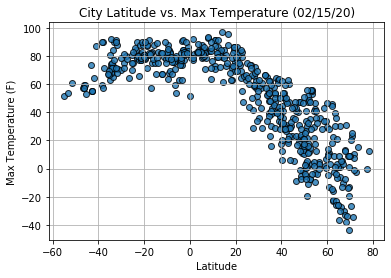

In [13]:
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime ("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/Fig1.png")

plt.show()

#### Latitude vs. Humidity Plot

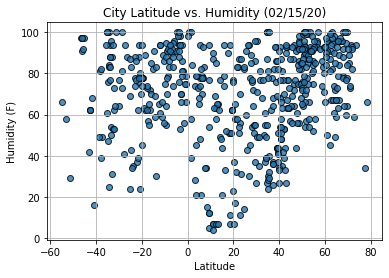

In [14]:
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
plt.title("City Latitude vs. Humidity (%s)" % time.strftime ("%x"))
plt.ylabel("Humidity (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/Fig2.png")

plt.show()

#### Latitude vs. Cloudiness Plot

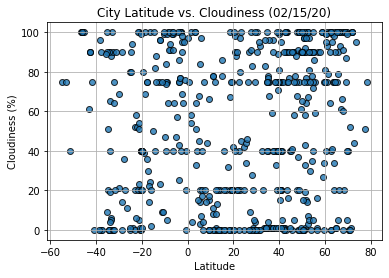

In [16]:
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime ("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/Fig3.png")

plt.show()

#### Latitude vs. Wind Speed Plot

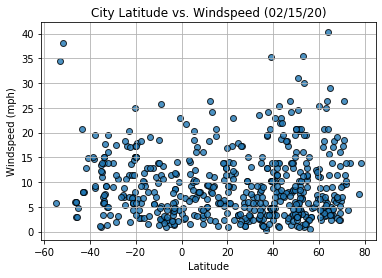

In [17]:
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
plt.title("City Latitude vs. Windspeed (%s)" % time.strftime ("%x"))
plt.ylabel("Windspeed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/Fig4.png")

plt.show()

## Linear Regression

In [26]:
# OPTIONAL: Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [35]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] >= 0)]
southern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] >= 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8583758434142797


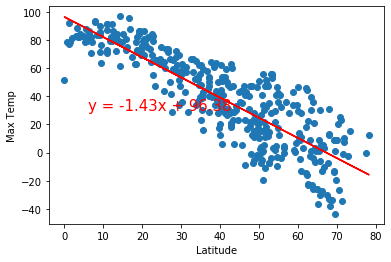

In [36]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, 'Max Temp', (6,30))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8583758434142797


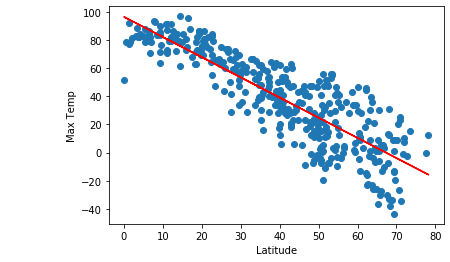

In [37]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, 'Max Temp', (-30,40))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.40601496287870714


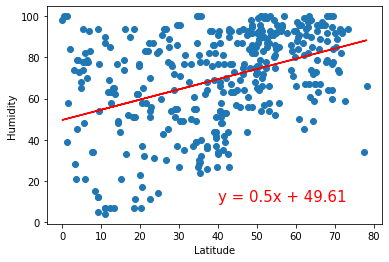

In [38]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, 'Humidity', (40,10))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.40601496287870714


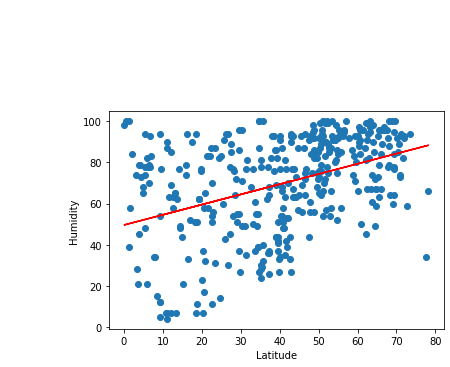

In [40]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, 'Humidity', (-30,150))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.272673775185847


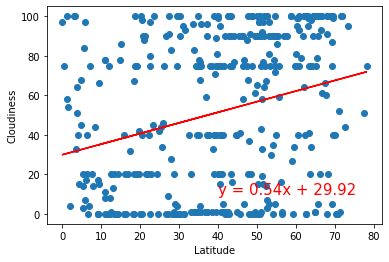

In [41]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.272673775185847


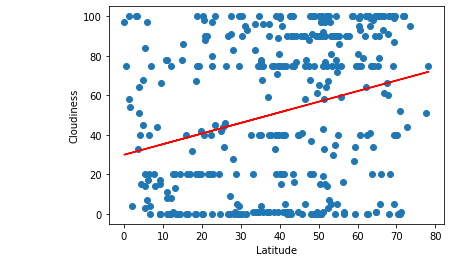

In [42]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.07345469731106087


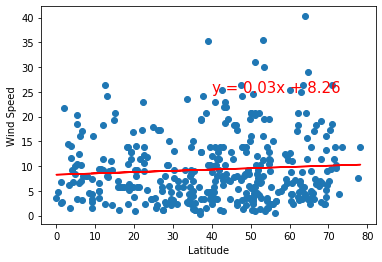

In [43]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.07345469731106087


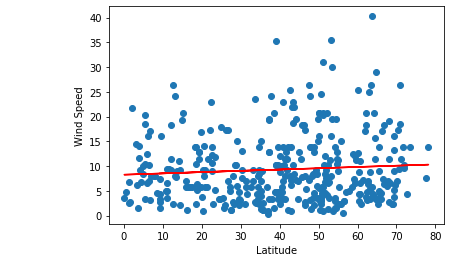

In [44]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values, 'Wind Speed', (-30,30))